## Project 6: The Titanic Survivor.

The Titanic date set in seaborn will be analyzed forcusing on the survivors. Using visual analysis to determine trends in a survivors class age or gender. Let travel back into time to get a glimpse at the survivors of the infamous Titanic

    # Author: Laura Dooley
    # Date: June 9, 2024

## Import Dependencies 

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Acquisition
    Using seaborn to load the dataset "Titanic". Printing out first few rows of dataset to have a reference of how the dataset's layout. 

In [47]:
#Loading dataset into panda
df = sns.load_dataset('titanic')

#print out the first few rows of the Titanic dataset
print(df.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


## Initial Data Inspection
Display the first 10 rows of the DataFrame, check the shape, and display the data types of each column using df.head(10), df.shape, and df.dtypes.

In [48]:
print(df.head(10))
print(df.shape)
print(df.dtypes)

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

## Initial Descriptive Statistics
Use the DataFrame describe() method to display summary statistics for each column.

In [49]:
# display summary statistics 
print(df.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


## Initial Data Distribution for Numerical Columns
Using df['column_name'].hist() to plot a histogram for the fare column. 



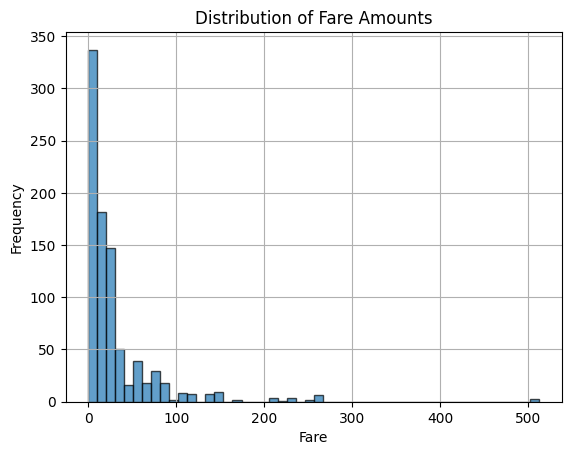

In [50]:

# Inspect histogram by numerical column
df['fare'].hist(bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Fare Amounts')
plt.xlabel('Fare')
plt.ylabel('Frequency')

# Show all plot
plt.show()


From the graph you can see the most frequent far was around $10. There is an outlyer fare of $500 that could increase the average fee a little higher than it should be. 

 Displaying graphs for all numerical columns by using df.hist()

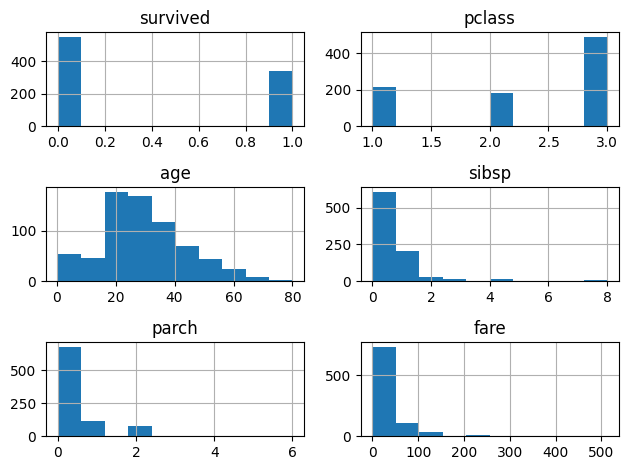

In [51]:

# Displaying graphs for all numeric columns resize to be able to read easier 
df.hist()

# Adjust layout for better spacing
plt.tight_layout()

# show plots
plt.show()

These graphs help describe the passengers aboard the Titanic
1. Survived graph 
    0 represents passenger death and 1 represents passenger survived. Looking at the graph it shows more of the passengers died in the accident. 
2. Class graph 
    there were 3 classes of passengers 1st, 2nd, and 3rd class. The graph shows the majority of the passengers were 3rd class which matches the majority of the fare cost were on the  lower end. 
3. Age graph
    The majority of the passengers were in the 20s or 30s 
4. Siblings/Spouse graph and Parent/Children graph
    The way the values are combined its hard to differeicent from the siblings and spouse or the parent and children.
5. The fare graph was already discussed. 



## Initial Data Distribution for Categorical Columns
 Using df['column_name'].value_counts() to display the count of the passengers sex. Then a loop is used to show the value counts for all categorical columns.


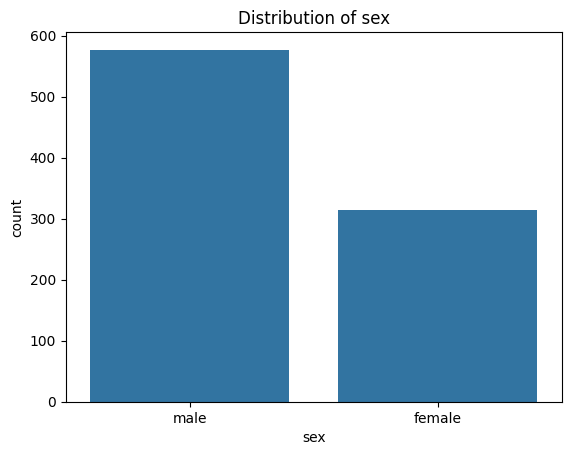

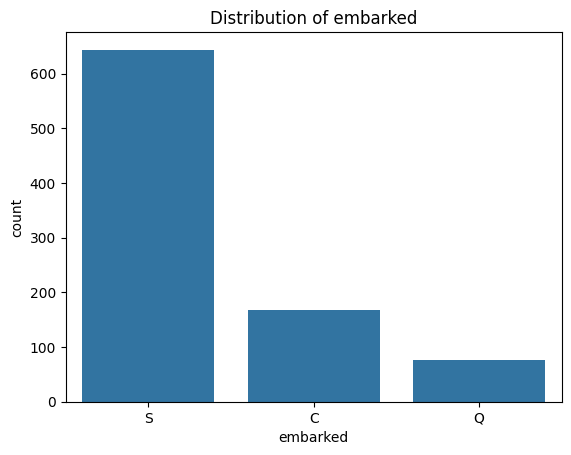

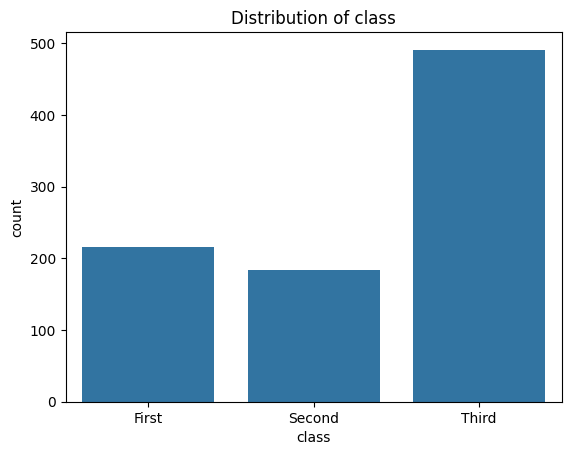

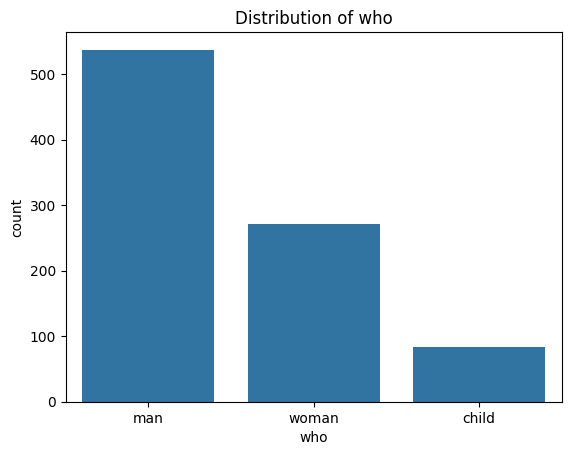

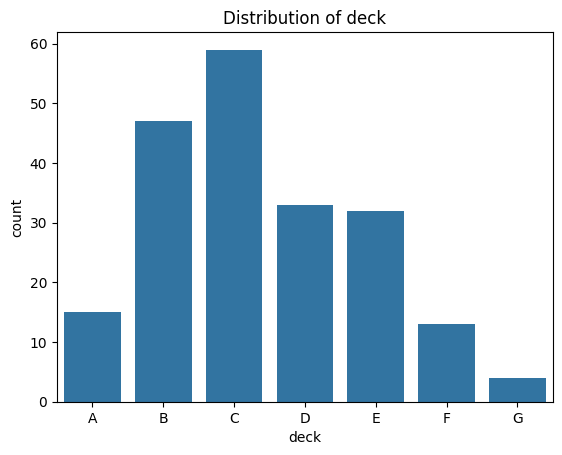

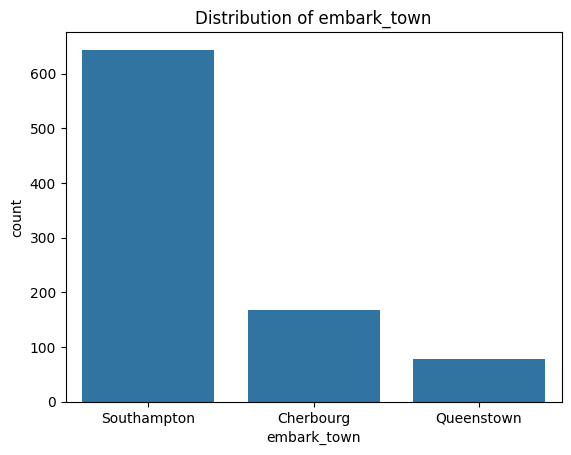

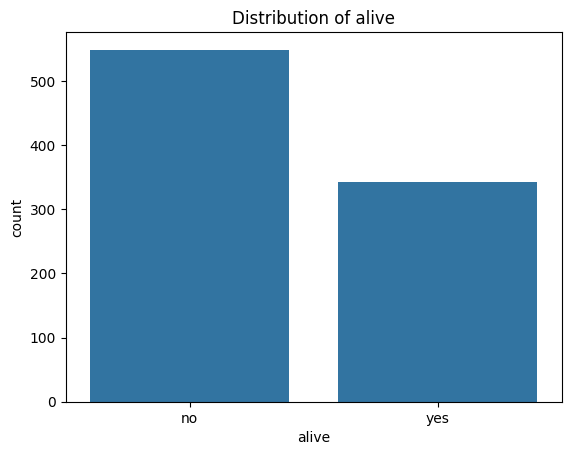

In [52]:
# Inspect value counts by categorical column
df['sex'].value_counts()

 #Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

These graphs show a clearer picture of the passengers then the numerical graph. The graphs clealy say how many passengers survived or not.  There are a couple charts that are duplicated. The embarkment charts are sayingthe same. One chart is using the full name of the town and the other is the first intial of the town. Not knowing the layout of the Titanic we could make and assumption that deck C is the thrid class. This conclusion is made since the majority of the passengers were third class, the third class deck should be the most frequent. 

# Initial Data Transformation and Feature Engineering
Using pandas and other tools, 2 columns will be renamed from sibsp to sibling;spouse and parch to parent;child. An extra row will be assed to the dataset to include if there fare was under or over the average fare. The first few rows will be displayed to verify changes. 

In [53]:
# Rename the 'sibsp' column to 'sibling;spouse'
df.rename(columns={'sibsp': 'sibling;spouse'}, inplace=True)

# Rename the 'parch' column to 'parent;child'
df.rename(columns={'parch': 'parent;child'}, inplace=True)

# Calculate the average fare
average_fare = df['fare'].mean()

# Create a new column to indicate fare comparison
df['fare_comparison'] = pd.cut(df['fare'], bins=[float('-inf'), average_fare, float('inf')],
    labels=['Below Average', 'Above Average'], include_lowest=True)

# Display the modified DataFrame
print(df.head())


   survived  pclass     sex   age  sibling;spouse  parent;child     fare  \
0         0       3    male  22.0               1             0   7.2500   
1         1       1  female  38.0               1             0  71.2833   
2         1       3  female  26.0               0             0   7.9250   
3         1       1  female  35.0               1             0  53.1000   
4         0       3    male  35.0               0             0   8.0500   

  embarked  class    who  adult_male deck  embark_town alive  alone  \
0        S  Third    man        True  NaN  Southampton    no  False   
1        C  First  woman       False    C    Cherbourg   yes  False   
2        S  Third  woman       False  NaN  Southampton   yes   True   
3        S  First  woman       False    C  Southampton   yes  False   
4        S  Third    man        True  NaN  Southampton    no   True   

  fare_comparison  
0   Below Average  
1   Above Average  
2   Below Average  
3   Above Average  
4   Below Averag

## Initial Visualizations
Will begin with determining which class had the md the most survivor within itself. A countplot will display the the survivors and non survivors of each class. Secondly, a histogram will show the age distubution of the passenger. The age range with the most survivors is presented on this graph. Lastly, a countplot will show the survivors in the male, female, and child groups. I have created functions to return the informatve graphs. 

In [54]:

def plot_class_distribution(data):
    """l
    Plots the number of Titanic passengers in each class with survival information.
    
    Parameters:
    data (DataFrame): The Titanic dataset.
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(x='class', data=data, hue='survived', palette='pastel')

    # Adding titles and labels
    plt.title('Number of Titanic Passengers in Each Class with Survival Information')
    plt.xlabel('Class')
    plt.ylabel('Number of Passengers')

    # Adding a legend
    plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])

    # Display the plot
    plt.show()

def plot_age_distribution(data):
    """
    Plots the age distribution of Titanic passengers by survival status.
    
    Parameters:
    data (DataFrame): The Titanic dataset.
    """
    plt.figure(figsize=(10, 6))

    # Plot the age distribution with survival status separation
    sns.histplot(data=data, x='age', bins=30, kde=True, hue='survived', multiple='stack', palette = 'pastel')

    # Adding titles and labels
    plt.title('Age Distribution of Titanic Passengers by Survival Status')
    plt.xlabel('Age')
    plt.ylabel('Frequency')

    # Adding legend
    plt.legend(title='Survived', labels=['No', 'Yes'], loc='upper right')

    # Display the plot
    plt.show()


   
def plot_passenger_survival_by_group(data):
    """
    Plots the number of Titanic passengers by gender and age group with survival information.
    
    Parameters:
    data (DataFrame): The Titanic dataset.
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(x='who', data=data, hue='survived', palette='pastel')

    # Adding titles and labels
    plt.title('Number of Titanic Passengers by Gender and Age Group with Survival Information')
    plt.xlabel('Person')
    plt.ylabel('Number of Passengers')

    # Adding a legend
    plt.legend(title='Survived', loc='upper right', labels=['Yes', 'No'])

    # Display the plot
    plt.show()



## 1.  Separating the passengers by class 

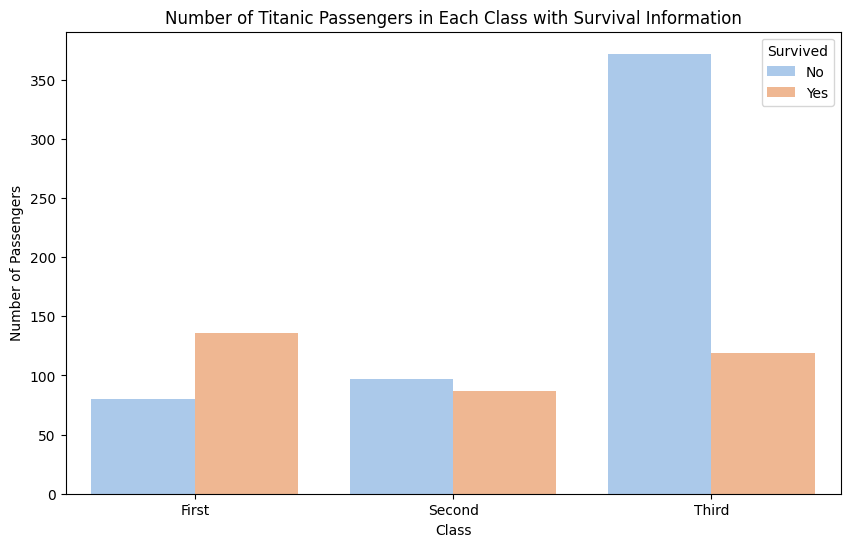

In [55]:
# Displaying surviving passengers by class 
plot_class_distribution(df)

A conlusion of the first class was more like lead to the safty boats first since the majority of this class were survivors. While the third class more likely had to wait or their quarters were to far from the safty boats and were unable to reach them at the time. 

## 2. Separating passengers by age 

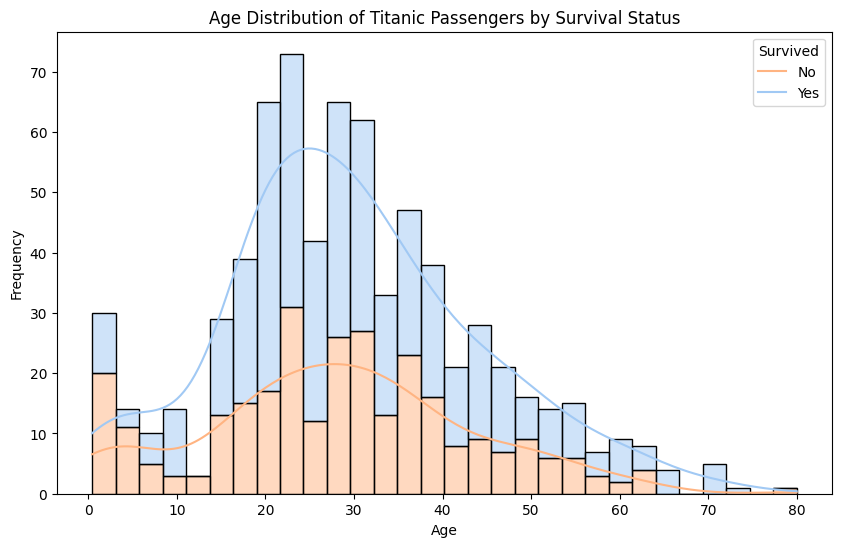

In [56]:
# displaying surviving passengers by age 
plot_age_distribution(df)

The graph the oragne is representing the passengers that didnt survive. When observing the infinte ages the fatalities were greater than the number of survivors. The age groups were mid twenties to early thirties or the extremely old. 

## 3. Separating the passengers by man woman and child.

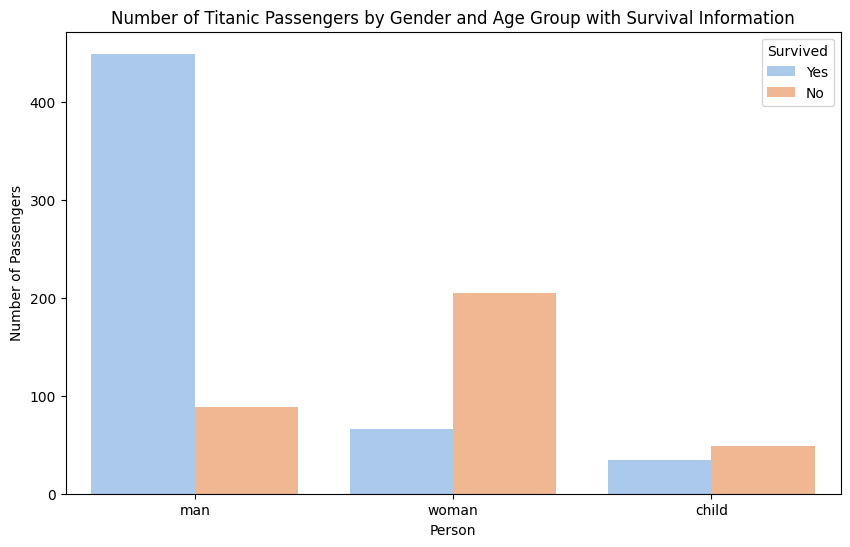

In [57]:
# Displaying surviving passenger by group 
plot_passenger_survival_by_group(df)


The information present the men group had the highest death rate, while the women and children were higher. This could make a conclusion the women and children were encouraged to be saved first. 

## Conclusion
From the data that was supplied, if you were a women in first class that was between the ages of 20 -30 there is a high chance you woould have survived the Titantic.